# Linear Regression Machine Learning Example
## Build a ML Model to predict car prices based on car features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Loading the data
car_data = pd.read_csv('car_data.csv')

# look at some of the data
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Get information about the dataset 

In [2]:
car_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## What we know
- The dataset has 301 rows and 9 columns and there are no null values in it. 
-  Dtype 'object' means text data
- The output ‘Selling_Price’ is the target, and there are multiple independent variables that affect this value. 
- This is a type of supervised Machine Learning problem where the output variables are labeled and the model is first trained on split data. 
- The model is then verified for its accuracy on validation/test data. 

# Replace text descriptions with numbers

In [3]:
# encoding Columns - replace text with numbers
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True) 
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True) 
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True) 

# display revised data frame
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Check how data correlates
To understand the relationship between different attributes in the dataset, we plot a correlation matrix.
- this information may be used to remove highly correlated data in order to make machine learning more efficient

/var/folders/kv/v86py0g90bz2ltt4gdqv5cg40000gn/T/ipykernel_72738/3562226459.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = car_data.corr()


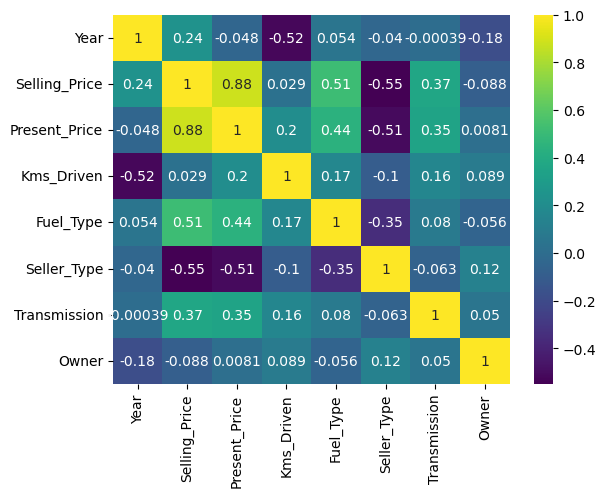

In [4]:
corrMatrix = car_data.corr() 
sns.heatmap(corrMatrix, annot=True, cmap='viridis') 
plt.show() 


# Drop columns from our data set
- Car_name has no relevance
- Selling_Price is what we are trying to predict

In [5]:
X = car_data.drop(['Car_Name','Selling_Price'],axis=1) 
X.head(7)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
5,2018,9.83,2071,1,0,0,0
6,2015,8.12,18796,0,0,0,0


In [6]:
# Create a separate 1 column matrix for the prices
Y = car_data['Selling_Price'] 
Y.head(7)

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
5    9.25
6    6.75
Name: Selling_Price, dtype: float64

# Split the data set into two parts
- training (usually 80%)
- testing (usually 20%)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42) 

In [8]:
# create a linear regression model (using the constructor)
lin_reg_model = LinearRegression() 

# Now we can fit the model to our dataset 
lin_reg_model.fit(X_train,Y_train)

print ("Linear Regression Model created")


Linear Regression Model created


# Generate prediction based on Training data
## Here we test how accurate we are over the training (not test) data

In [9]:
training_data_prediction = lin_reg_model.predict(X_train) 

In [10]:
# R squared Error 
train_error_score = metrics.r2_score(Y_train, training_data_prediction) 

print("R squared Error - for Training  Data: ", train_error_score) 


R squared Error - for Training  Data:  0.8839793496750796


# Predict using Test data 

In [11]:
Y_pred = lin_reg_model.predict(X_test) 

test_error_score = metrics.r2_score(Y_test, Y_pred)

print("R squared Error - Test: ", test_error_score) 

R squared Error - Test:  0.8468053957653994


# Create scatterplot with regression line 

<Axes: xlabel='Selling_Price'>

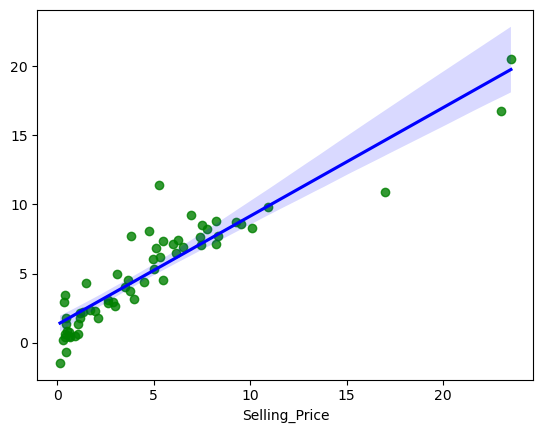

In [13]:
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"})